# IMPORTS AND HARDWARE

In [ ]:
!pip install labelme tensorflow opencv-python matplotlib albumentations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 20.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.1/338.1 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 5.5 MB/s eta 0:00:00
  Created wheel for labelme: filename=labelme-5.4.1-py3-none-any.whl size=1436184 sha256=234b45f5e7c54dfb32f953992fc3d1c5271e049fa6690e05308019fe6c9e1ae1
  Stored in directory: /root/.cache/pip/wheels

In [3]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt
import cv2
import time
import json
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score, recall_score
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# DATASET PREP

In [ ]:
#Pulling all image paths
images = tf.data.Dataset.list_files("/content/drive/MyDrive/cs231n_project/16_frame_imgs/*.jpg",shuffle = False)
images_array = np.array(list(images.as_numpy_iterator()))
print(images_array.shape)

(13200,)


In [ ]:
#Preparing Label Dictionary
with open('/content/drive/MyDrive/cs231n_project/16_fram_imgs.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

In [ ]:
images_array = np.array(list(images.as_numpy_iterator()))#[:-3600]

# Create a boolean mask to filter out repeated images
mask = np.array([str(val)[-6] != ')' for val in images_array])
# Apply the mask to images array
images_array = images_array[mask]
print(images_array.shape)

(13200,)


In [ ]:
labels_array = []
imagesFinal = []

#Creating image-label parallel arrays
for image in images_array:
  imagesFinal.append(image)
  #Isolating image ID
  s = str(image)
  last_slash_index = s.rfind('/')
  new_string = s[last_slash_index + 1:-1]
  labels_array.append(data[new_string])

images_array = np.array(imagesFinal)
print(len(imagesFinal))

Streaming output truncated to the last 5000 lines.
b'/content/drive/MyDrive/cs231n_project/16_frame_imgs/qcxkxcemcb_frame3.jpg'
b'/content/drive/MyDrive/cs231n_project/16_frame_imgs/qcxkxcemcb_frame4.jpg'
b'/content/drive/MyDrive/cs231n_project/16_frame_imgs/qcxkxcemcb_frame5.jpg'
b'/content/drive/MyDrive/cs231n_project/16_frame_imgs/qcxkxcemcb_frame6.jpg'
b'/content/drive/MyDrive/cs231n_project/16_frame_imgs/qcxkxcemcb_frame7.jpg'
b'/content/drive/MyDrive/cs231n_project/16_frame_imgs/qcxkxcemcb_frame8.jpg'
b'/content/drive/MyDrive/cs231n_project/16_frame_imgs/qcxkxcemcb_frame9.jpg'
b'/content/drive/MyDrive/cs231n_project/16_frame_imgs/qdofrrdnim_frame0.jpg'
b'/content/drive/MyDrive/cs231n_project/16_frame_imgs/qdofrrdnim_frame1.jpg'
b'/content/drive/MyDrive/cs231n_project/16_frame_imgs/qdofrrdnim_frame10.jpg'
b'/content/drive/MyDrive/cs231n_project/16_frame_imgs/qdofrrdnim_frame11.jpg'
b'/content/drive/MyDrive/cs231n_project/16_frame_imgs/qdofrrdnim_frame12.jpg'
b'/content/drive/MyDri

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images_array, labels_array, test_size=0.2, random_state=1,shuffle=False)
X_test, X_dev, y_test, y_dev = train_test_split(X_test, y_test, test_size=0.5, random_state=1,shuffle=False)

print("Train Len: ", len(y_train), "Train Non_Zeros: ", np.count_nonzero(y_train))
print("Test Len: ", len(y_test), "Test Non_Zeros: ", np.count_nonzero(y_test))
print("Val Len: ", len(y_dev), "Val Non_Zeros: ", np.count_nonzero(y_dev))


Train Len:  10560 Train Non_Zeros:  3392
Test Len:  1320 Test Non_Zeros:  480
Val Len:  1320 Val Non_Zeros:  368


## Dataset Preprocessing

In [ ]:
#Converts file path into image
def load_image(x):
    #reading in file name
    byte_img = tf.io.read_file(x)
    #converting to img array
    img = tf.io.decode_jpeg(byte_img)
    return img

In [ ]:
def preprocessData(x,y,batchSize,shuffle):
  sizeTup = (int(1080*(1/5)),int(1920*(1/5)))
  print(sizeTup)
  x = tf.data.Dataset.from_tensor_slices(x)
  x = x.map(load_image)
  x = x.map(lambda pi: tf.image.resize(pi,sizeTup))
  x = x.map(lambda pi: pi/255)

  y = tf.data.Dataset.from_tensor_slices(y)

  #Creating image-label pairs and final dataset prep
  zip = tf.data.Dataset.zip((x,y))

  #Shuffle
  if shuffle:
    zip = zip.shuffle(5000)
  #Batch
  zip = zip.batch(batchSize)
  zip = zip.prefetch(4)
  return zip


In [ ]:
train = preprocessData(X_train,y_train,16,True)
val = preprocessData(X_dev,y_dev,16,True)
test = preprocessData(X_test,y_test,16,True)







(216, 384)
(216, 384)
(216, 384)


In [ ]:
sizeTup = (int(1080*(1/10)),int(1920*(1/10)))
print(sizeTup)
X_test = tf.data.Dataset.from_tensor_slices(X_test)
X_test = X_test.map(load_image)
X_test = X_test.map(lambda pi: tf.image.resize(pi,sizeTup))
X_test = X_test.map(lambda pi: pi/255)

y_test = tf.data.Dataset.from_tensor_slices(y_test)




(216, 384)


# DATA VIZUALISER

In [ ]:
#Vizualzing
image_generator = X_train.as_numpy_iterator()
image = image_generator.next()
image.shape
count = 0
while count < 20:
  image = image_generator.next()
  plt.imshow(image)
  plt.axis("off")
  plt.show()
  count+=1

AttributeError: 'numpy.ndarray' object has no attribute 'as_numpy_iterator'

In [ ]:
print(image.shape)

(216, 384, 3)


#MODEL ResNet50 Spatial Features

## Building Model

In [1]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input,Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

def build_res():
  #input layer
  input_layer = Input(shape=(108,192,3))

  #Pretrained ResNetModel
  base_model = ResNet50(weights='imagenet', include_top=False)(input_layer)


  averageLayer = GlobalAveragePooling2D()(base_model)
  layer1 = Dense(1024, activation='relu')(averageLayer)
  layer2 = Dense(512,activation='relu')(layer1)
  layer3 = Dense(512,activation='relu')(layer2)
  output = Dense(1, activation='sigmoid')(layer3)

  # Create the final model
  model_res = Model(inputs=input_layer, outputs=[output])

  # Freeze the pre-trained layers (optional)
  '''
  for layer in base_model.layers:
      layer.trainable = False'''

  return model_res



In [2]:
model_res = build_res()
model_res.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
model_res.summary()

94765736/94765736 [==============================] - 2s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 108, 192, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, None, None, 2048   23587712  
                             )                                   
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                              

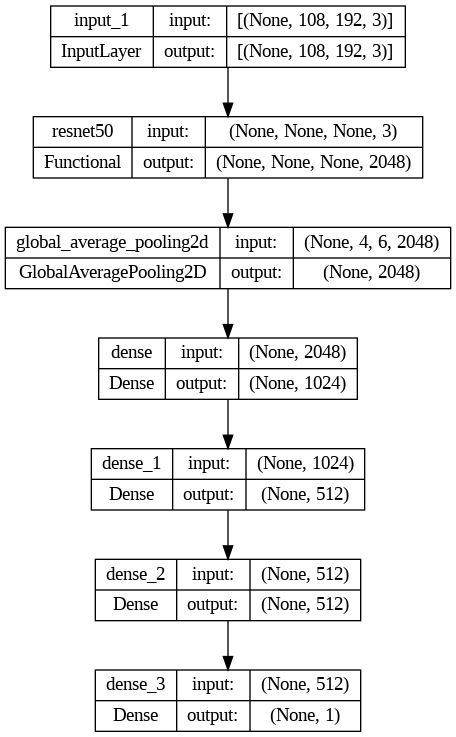

In [4]:
from tensorflow.keras.utils import plot_model
plot_model(model_res, to_file='/content/drive/MyDrive/cs231n_project/Model_Visualization/CNN_Baseline.png', show_shapes=True, show_layer_names=True)

## Res Training

In [ ]:
history_res = model_res.fit(train, epochs=20, validation_data=val)

Epoch 1/20


In [ ]:
model_res.save("baselinemodel.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model_res.save("baselinemodel.keras")

In [ ]:
history_res_dict = history_res.history
json.dump(history_res_dict, open("training_history_baseline", 'w'))

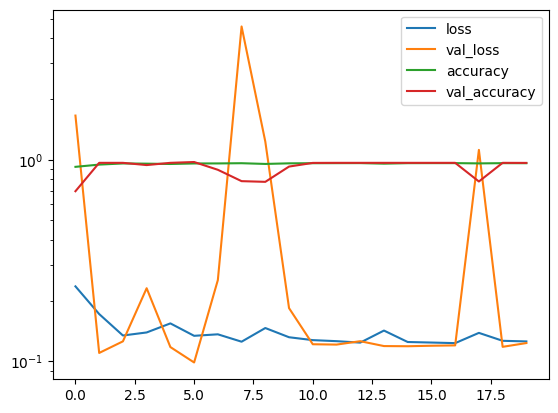

In [ ]:
history_res_df = pd.DataFrame(history_res_dict)

plt.plot(history_res_df['loss'], label='loss')
plt.plot(history_res_df['val_loss'], label='val_loss')
plt.plot(history_res_df['accuracy'], label='accuracy')
plt.plot(history_res_df['val_accuracy'], label='val_accuracy')

plt.yscale('log')
plt.legend()
plt.show()


## Res Testing

In [ ]:
model_res = tf.keras.models.load_model("/content/drive/MyDrive/cs231n_project/DeepFake_Baseline_Model.h5")

In [ ]:
model_res.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 216, 384, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, None, None, 2048   23587712  
                             )                                   
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 512)               262656

In [ ]:
X_res_test = X_test.batch(16)
yArr = np.array(list(y_test.as_numpy_iterator()))
#Baseline Continous Predictions
predicted_test_res = model_res.predict(X_res_test)

83/83 [==============================] - 155s 2s/step


In [ ]:
#Changing continuous into binary predictions
predicted_test_res_binary = np.where(predicted_test_res > 0.5, 1.0, 0.0)

In [ ]:
#Getting Res Accuracy and Precision score:

res_test_accuracy = accuracy_score(yArr, predicted_test_res_binary)
res_test_precision = precision_score(yArr, predicted_test_res_binary)
res_test_recall = recall_score(yArr, predicted_test_res_binary)

print("Res test Accuracy: ",res_test_accuracy)
print("Res test Precision: ",res_test_precision)
print("Res test Recall: ",res_test_recall)

Res test Accuracy:  0.9515151515151515
Res test Precision:  0.8918918918918919
Res test Recall:  1.0


In [ ]:
print("Total Predicted Labels: ", len(predicted_test_res_binary), "Predicted \"real\" images: ", np.count_nonzero(predicted_test_res_binary))
print("Total Actual Labels: ", len(yArr), "Actual \"real\" images: ", np.count_nonzero(yArr))

Total Predicted Labels:  1320 Predicted "real" images:  592
Total Actual Labels:  1320 Actual "real" images:  528


In [ ]:
np.savetxt('predicted_labels_face.txt', predicted_test_res)
np.savetxt('correct_labels_face.txt', yArr)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## VIDEO LOADER

In [ ]:
import cv2
import numpy as np
import tensorflow as tf

#change if you want a diff number of frames per vid
NUM_FRAMES = 16

def extract_frames(video_path, num_frames=NUM_FRAMES):
    #print(video_path)
    video = cv2.VideoCapture(video_path)
    total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    #print(total_frames)
    frames_step = total_frames // num_frames
    frames = []
    for i in range(num_frames):
        video.set(cv2.CAP_PROP_POS_FRAMES, i*frames_step)
        success, frame = video.read()
        if success:
            frames.append(frame)
    video.release()
    return frames

def preprocess_frame(frame):
    # change frame to a tensor
    frame_tensor = tf.convert_to_tensor(frame, dtype=tf.float32)
    # resize to a fifth of the size
    size_tuple = (int(1080*(1/5)), int(1920*(1/5)))
    resized_frame = tf.image.resize(frame_tensor, size_tuple)
    #normalize
    normalized_frame = resized_frame / 255.0
    return normalized_frame

def predict_frames(frames,model):
    predictions = []
    for frame in frames:
        processed_frame = preprocess_frame(frame)
        prediction = model.predict(np.expand_dims(processed_frame, axis=0))
        predictions.append(prediction)
    #print(predictions)
    return predictions

def is_deepfake(predictions, threshold=0.8):
    # Assuming the model outputs a probability of being real
    fake_count = sum(pred > 0.5 for pred in predictions)
    # If the majority of frames are real, the video is considered not a deepfake
    return fake_count >= threshold*len(predictions)  # If not, it's considered a deepfake
#usage below
def is_deepfakeVideo(path,model):
    video_path = path
    #model_path = 'resmodel.h5'

    frames = extract_frames(video_path)
    #print(len(frames))
    predictions = predict_frames(frames, model)
    result = is_deepfake(predictions)
    return result


In [ ]:
with open('/content/drive/MyDrive/CS131_Proj/test_videos/metadata.json', 'r', encoding='utf-8') as f:
    data = json.load(f)
labels = data.values()

In [ ]:
def read_json(path, real_only=False):
    with open(path, 'r') as file:
        data = json.load(file)
        if real_only:
            return {mp4_file: 0 for mp4_file, details in data.items() if details['label'] == 'REAL'}
        else:
            return {mp4_file: 1 if details['label'] == 'FAKE' else 1 for mp4_file, details in data.items()}

In [ ]:
path = '/content/drive/MyDrive/CS131_Proj/test_videos/metadata.json'
data = read_json(path)
labels = data.values()

In [ ]:
videoPaths = tf.data.Dataset.list_files("/content/drive/MyDrive/CS131_Proj/test_videos/*.mp4",shuffle = False)
video_paths_array = np.array(list(videoPaths.as_numpy_iterator()), dtype=str)
videoPred = []
count = 1
for path in video_paths_array:
  if count > 30:
    break
  result = is_deepfakeVideo(path,model_res)
  print("DONE: ",count)
  videoPred.append(result)
  count+=1
videoPred_arr = np.array(videoPred)

1/1 [==============================] - 0s 22ms/step
DONE:  1
1/1 [==============================] - 0s 22ms/step
DONE:  2
1/1 [==============================] - 0s 21ms/step
DONE:  3
1/1 [==============================] - 0s 21ms/step
DONE:  4
1/1 [==============================] - 0s 20ms/step
DONE:  5
1/1 [==============================] - 0s 21ms/step
DONE:  6
1/1 [==============================] - 0s 20ms/step
DONE:  7
1/1 [==============================] - 0s 20ms/step
DONE:  8
1/1 [==============================] - 0s 20ms/step
DONE:  9
1/1 [==============================] - 0s 20ms/step
DONE:  10
1/1 [==============================] - 0s 20ms/step
DONE:  11
1/1 [==============================] - 0s 20ms/step
DONE:  12
1/1 [==============================] - 0s 22ms/step
DONE:  13
1/1 [==============================] - 0s 21ms/step
DONE:  14
1/1 [==============================] - 0s 21ms/step
DONE:  15
1/1 [==============================] - 0s 21ms/step
DONE:  16
1/1 [============

In [ ]:
yArr = list(labels)[0:30]
yArr = np.array(yArr)
print(videoPred_arr)
print(yArr)

NameError: name 'videoPred_arr' is not defined

In [ ]:
vid_test_accuracy = accuracy_score(yArr, videoPred_arr)
vid_test_precision = precision_score(yArr, videoPred_arr)
vid_test_recall = recall_score(yArr, videoPred_arr)

print("Vid test Accuracy: ",vid_test_accuracy)
print("Vid test Precision: ",vid_test_precision)
print("Vid test Recall: ",vid_test_recall)

Vid test Accuracy:  0.6
Vid test Precision:  0.1111111111111111
Vid test Recall:  0.2
